<a href="https://colab.research.google.com/github/Jaime-Gomez-Vera/Metodos-Numericos/blob/main/Spline_c%C3%BAbico_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

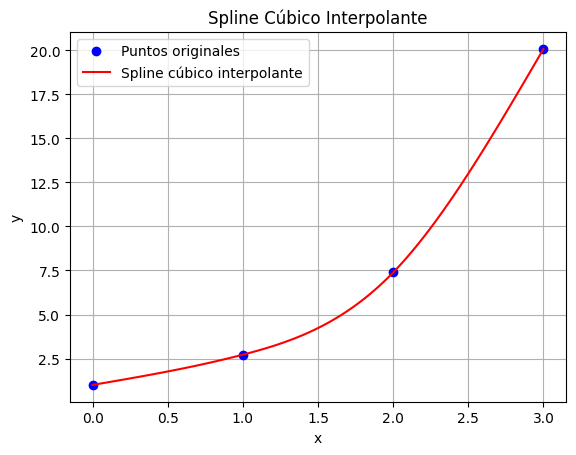

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def spline_cubico_interpolante(x, y):
    n = len(x) - 1
    h = np.diff(x)
    alpha = np.zeros(n)
    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (y[i + 1] - y[i]) - (3 / h[i - 1]) * (y[i] - y[i - 1])

    l = np.zeros(n + 1)
    mu = np.zeros(n + 1)
    z = np.zeros(n + 1)
    l[0] = 1
    mu[0] = z[0] = 0

    for i in range(1, n):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = np.zeros(n + 1)
    b = np.zeros(n)
    d = np.zeros(n)
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    splines = []
    for i in range(n):
        spline = {'a': y[i], 'b': b[i], 'c': c[i], 'd': d[i], 'x': x[i]}
        splines.append(spline)

    return splines

def evaluar_spline(spline, x):
    a = spline['a']
    b = spline['b']
    c = spline['c']
    d = spline['d']
    return a + b * (x - spline['x']) + c * (x - spline['x'])**2 + d * (x - spline['x'])**3


x = [0, 1, 2, 3]
y = [1, np.e, np.e**2, np.e**3]

splines = spline_cubico_interpolante(x, y)


x_interp = np.linspace(0, 3, 100)
y_interp = np.zeros_like(x_interp)
for i in range(len(x) - 1):
    spline = splines[i]
    indices = np.where((x_interp >= spline['x']) & (x_interp <= x[i + 1]))
    y_interp[indices] = evaluar_spline(spline, x_interp[indices])


plt.plot(x, y, 'bo', label='Puntos originales')
plt.plot(x_interp, y_interp, 'r-', label='Spline cúbico interpolante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Cúbico Interpolante')
plt.legend()
plt.grid(True)
plt.show()
